In [1]:
import uproot
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def add_mass(df) :
    stop_points = [145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295]
    chi0_points = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    df['stop_mass'] = np.random.choice(stop_points, len(df))
    df['chi0_mass'] = np.random.choice(chi0_points, len(df))
    return df

In [180]:
fileptr = open('filelist', 'r')
lines   = fileptr.readlines()
df      = []

for i, line in zip(range(75), lines) :
    line  = line.strip('\n')
    df.append(pd.read_pickle('Pkl_files/' + str(line)))

In [181]:
sig_df = pd.concat(df)
tt_df  = pd.read_pickle('DESY_ttbar_sc.pkl')

In [182]:
sig_event_w = sig_df['event_w']
tt_event_w  = tt_df['event_w']

In [183]:
add_mass(tt_df)

,l_pt,l_eta,l_phi,lbar_pt,lbar_eta,lbar_phi,llbar_dphi,llbar_deta,MET,MT2,...,c_kr,c_rr,c_nr,c_kn,c_rn,c_nn,c_hel,c_lab,stop_mass,chi0_mass
0,68.813210,0.783428,2.222546,27.302094,0.082621,-0.567994,2.790541,0.700806,14.512433,0.000000,...,-0.188887,-0.275797,-0.050490,0.512305,0.748024,0.136939,0.257328,-0.653430,215,30
1,53.816910,-0.504254,2.551759,33.045055,0.294797,-2.934131,0.797296,0.799050,43.682690,50.876019,...,0.153247,0.077332,-0.050714,-0.267863,-0.135171,0.088645,0.632656,0.459047,235,50
2,32.939449,-0.926941,-0.003557,59.064556,1.881812,-1.639201,1.635645,2.808753,91.645790,22.457380,...,0.051825,0.090523,0.139197,0.071984,0.125735,0.193343,-0.568297,-0.709302,255,80
3,38.570145,0.044036,-0.254580,71.512238,-0.361570,-1.887602,1.633022,0.405607,12.062650,28.308147,...,-0.277294,0.183380,0.561415,0.017171,-0.011356,-0.034765,-0.470227,-0.073528,165,80
4,43.054966,0.135901,-0.793442,61.946774,-0.311101,-0.248813,0.544630,0.447003,50.947243,62.756882,...,-0.149129,-0.201287,0.458252,0.243425,0.328565,-0.748013,0.955782,0.767345,205,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701589,66.935829,2.153407,-1.503892,86.495033,1.034294,-2.998834,1.494943,1.119113,48.078011,51.982887,...,0.043234,-0.077071,-0.140536,0.249728,-0.445176,-0.811767,0.828923,0.765956,295,10
701590,63.952545,-0.625261,3.096637,40.639206,-1.788905,-0.643407,2.543142,1.163644,80.425903,41.749691,...,-0.109382,0.326438,0.401134,-0.036282,0.108279,0.133056,-0.287635,0.301081,155,70
701591,218.240356,-1.833916,-0.114161,41.113899,-0.247579,-2.690945,2.576784,1.586337,138.901169,68.829445,...,-0.023510,0.140920,0.148775,0.016109,-0.096558,-0.101939,0.071379,-0.024794,155,50
701592,25.682802,-1.336810,-1.585265,34.545418,1.292909,1.724235,2.973686,2.629719,71.261551,0.000000,...,-0.104978,0.434973,-0.852770,0.009495,-0.039344,0.077134,-0.539893,-0.996230,295,90


In [184]:
sig_df = sig_df.sample(frac=1)
sig_df = sig_df.reset_index()
tt_df  = tt_df.sample(frac=1)
tt_df  = tt_df.reset_index()

In [185]:
selected_columns = ['l_pt','l_phi','l_eta', 'lbar_pt', 'lbar_phi', 'lbar_eta', 'llbar_dphi', 'llbar_deta','MET','MT2', 'stop_mass', 'chi0_mass']

sig_df = sig_df[selected_columns]
tt_df  = tt_df[selected_columns]

In [186]:
# Standardize
# sig_mean = sig_df.mean()
# sig_std  = sig_df.std()

# tt_mean = tt_df.mean()
# tt_std  = tt_df.std()

# sig_df    = (sig_df - sig_mean)/ sig_std
# tt_df     = (tt_df  - tt_mean)/ tt_std

In [187]:
# signal    = sig_df.values
# bkg       = tt_df.values

# sig_label = np.ones(len(signal))
# bkg_label = np.zeros(len(bkg))

# data      = np.concatenate((signal,bkg))
# label     = np.concatenate((sig_label,bkg_label))

In [188]:
sig_df

,l_pt,l_phi,l_eta,lbar_pt,lbar_phi,lbar_eta,llbar_dphi,llbar_deta,MET,MT2,stop_mass,chi0_mass
0,51.340504,-0.324122,-0.308566,42.522121,2.154049,-0.145957,2.478172,0.162609,48.005707,13.021739,275.0,80.0
1,79.631569,2.454706,-1.207779,46.443123,1.999144,0.179928,0.455561,1.387707,159.375595,1.470645,245.0,80.0
2,42.584160,0.301137,-0.782113,44.665131,2.806168,-0.815155,2.505031,0.033042,110.973175,2.441473,225.0,20.0
3,54.166527,-1.142503,-0.038876,20.515236,-2.836804,-0.350982,1.694301,0.312106,16.589567,2.272508,215.0,50.0
4,28.335114,2.004448,1.013626,82.734200,2.707106,-0.732501,0.702658,1.746127,16.995979,36.641911,215.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2987966,22.162571,2.908724,-1.805839,50.493626,-1.622056,-0.756429,1.752405,1.049410,155.451096,77.503151,225.0,20.0
2987967,85.013863,-2.115017,-0.241001,43.998444,-2.320702,0.971384,0.205684,1.212385,40.485008,62.437206,215.0,40.0
2987968,34.567642,2.618049,0.519551,49.905762,-0.690569,-0.367354,2.974567,0.886905,48.347893,0.000000,245.0,60.0
2987969,22.348433,-1.346313,1.720038,60.900040,0.131107,0.138538,1.477421,1.581500,187.481079,23.736418,285.0,100.0


In [189]:
# Select about half of whichever dataframe is smaller

sig_df_train = sig_df[:300000]
tt_df_train  = tt_df[:300000]

sig_df_val   = sig_df[300000:400000]
tt_df_val    = tt_df[300000:400000]

sig_df_test  = sig_df[400000:]
tt_df_test   = tt_df[400000:]

# sig_df_train = (sig_df_train - sig_df_train.mean())/ sig_df_train.std()
# tt_df_train  = (tt_df_train  - tt_df_train.mean())/ tt_df_train.std()

# sig_df_val  = (sig_df_val - sig_df_val.mean())/ sig_df_val.std()
# tt_df_val   = (tt_df_val  - tt_df_val.mean())/ tt_df_val.std()

# sig_df_test  = (sig_df_test - sig_df_test.mean())/ sig_df_test.std()
# tt_df_test   = (tt_df_test  - tt_df_test.mean())/ tt_df_test.std()

In [190]:
train_signal    = sig_df_train.values
train_bkg       = tt_df_train.values

train_sig_label = np.ones(len(train_signal))
train_bkg_label = np.zeros(len(train_bkg))

train_data      = np.concatenate((train_signal,train_bkg))
train_label     = np.concatenate((train_sig_label,train_bkg_label))

In [191]:
val_signal     = sig_df_val.values
val_bkg        = tt_df_val.values

val_sig_label  = np.ones(len(val_signal))
val_bkg_label  = np.zeros(len(val_bkg))

val_data       = np.concatenate((val_signal,val_bkg))
val_label      = np.concatenate((val_sig_label,val_bkg_label))

In [192]:
test_signal    = sig_df_test.values
test_bkg       = tt_df_test.values

test_sig_label = np.ones(len(test_signal))
test_bkg_label = np.zeros(len(test_bkg))

test_data      = np.concatenate((test_signal,test_bkg))
test_label     = np.concatenate((test_sig_label,test_bkg_label))

In [193]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=2, shuffle=True)
# skf.get_n_splits(data, label)
# skf.split(data, label)

# for train_index, test_index in skf.split(data, label):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = data[train_index], data[test_index]
#     y_train, y_test = label[train_index], label[test_index]

In [194]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
model.add(Dense(100, input_dim = 12 ,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100, input_dim = 100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1300      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________


In [195]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [196]:
# hist = model.fit(train_data, train_label, batch_size=128, epochs=50,verbose=1, shuffle=True, validation_split=0.2,
#                   callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
#                   ModelCheckpoint(filepath='model.h5', verbose=0)])

In [197]:
shuffler    = np.random.permutation(len(train_label))
train_data  = train_data[shuffler]
train_label = train_label[shuffler]

In [198]:
shuffler  = np.random.permutation(len(val_label))
val_data  = val_data[shuffler]
val_label = val_label[shuffler]

In [199]:
hist = model.fit(train_data, train_label, batch_size=32, epochs=50,verbose=1, shuffle=True, validation_data=(val_data, val_label),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18673/18750 [============================>.] - ETA: 0s - loss: 0.7040 - accuracy: 0.6132WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2ab1501f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

In [200]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Loss' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    plt.title('Cross Entropy Loss by Epoch', fontsize=17)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)

    plt.legend(fontsize=17)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Accuracy' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=17)
    plt.show()

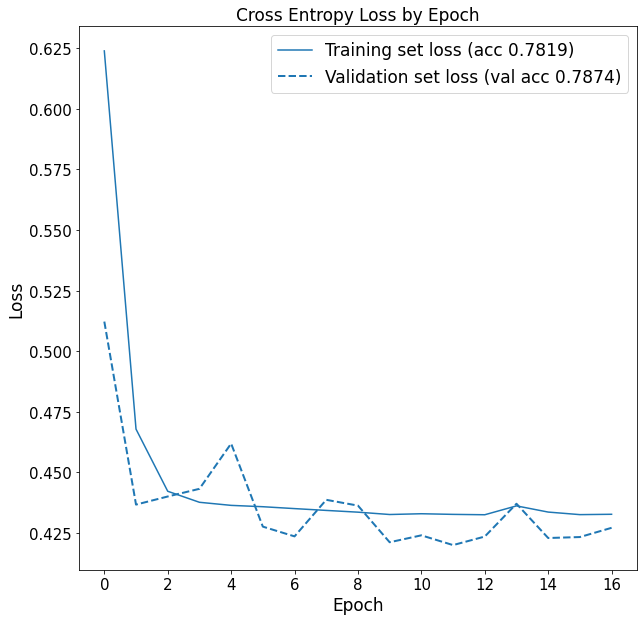

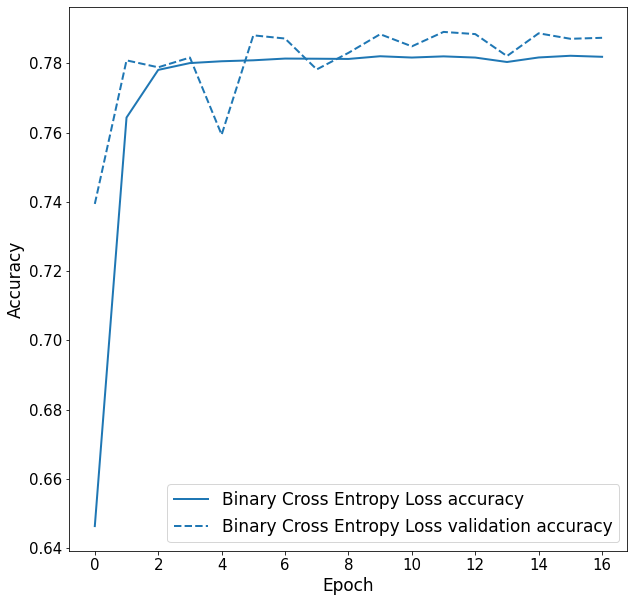

In [201]:
show_losses( [("Binary Cross Entropy Loss", hist)])

In [202]:
tt_pred  = model.predict(tt_df_test) 
si_pred  = model.predict(sig_df_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


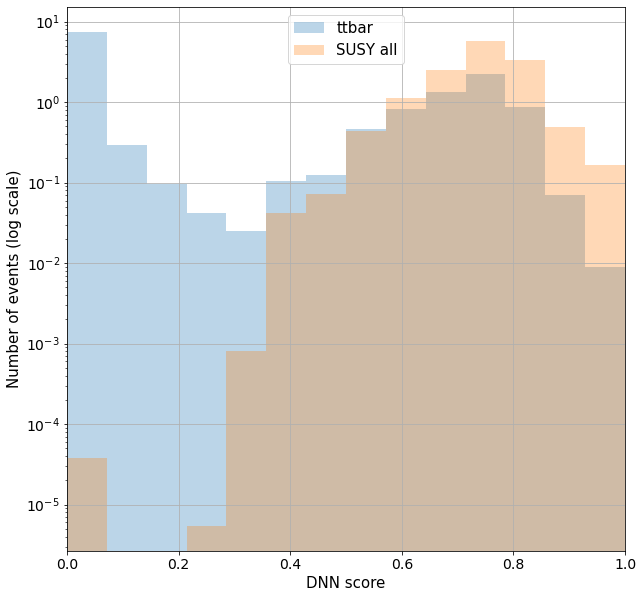

In [203]:
binning = np.linspace(0, 1, 15)
plt.figure(figsize=(10,10))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(tt_pred, bins=binning, alpha=0.3, label='ttbar', density=True)
plt.hist(si_pred, bins=binning, alpha=0.3, label='SUSY all', density=True)
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('DNN score', fontsize=15)
plt.ylabel('Number of events (log scale)', fontsize=15)
plt.grid()
plt.legend(loc='best', fontsize=15)
#plt.savefig('DNN score Mstop_235 Mchi_60.jpg')

In [204]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_pred_val   = model.predict(val_data).ravel()
y_pred_test  = model.predict(test_data).ravel()

fpr_keras_val, tpr_keras_val, thresholds_keras     = roc_curve(val_label, y_pred_val)
fpr_keras_test , tpr_keras_test , thresholds_keras = roc_curve(test_label , y_pred_test)

auc_keras_test = auc(fpr_keras_test, tpr_keras_test)
auc_keras_val  = auc(fpr_keras_val, tpr_keras_val)

2021-09-28 19:58:58.450725: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph sequential_7/MLCSubgraphOp_27_0 with frame_id = 0 and iter_id = 0 with error: Internal: ConvertOpNodes: MLCGraph is nil after processing all TF ops. (error will be reported 5 times unless TF_MLC_LOGGING=1).
2021-09-28 19:58:58.451784: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph sequential_7/MLCSubgraphOp_27_0 with frame_id = 0 and iter_id = 0 with error: Internal: ConvertOpNodes: MLCGraph is nil after processing all TF ops. (error will be reported 5 times unless TF_MLC_LOGGING=1).
2021-09-28 19:58:58.452497: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph sequential_7/MLCSubgraphOp_27_0 with frame_id = 0 and iter_id = 0 with error: Internal: ConvertOpNodes: MLCGraph is nil after processing all TF ops. (error will

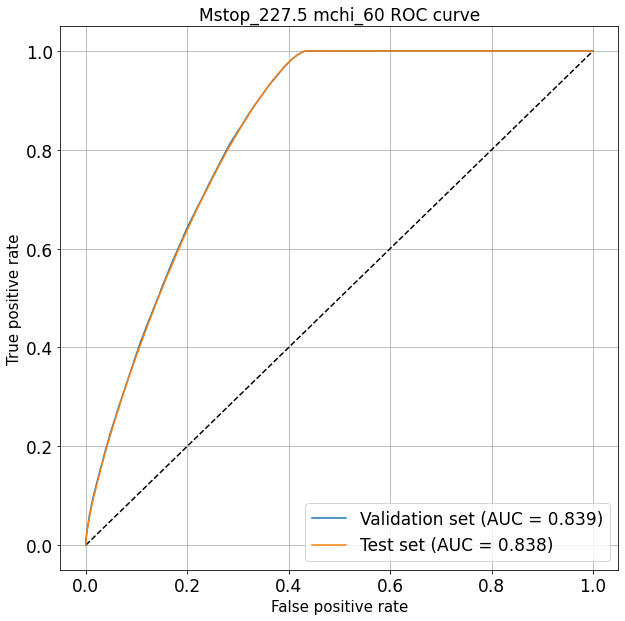

In [205]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_val, tpr_keras_val, label='Validation set (AUC = {:.3f})'.format(auc_keras_val))
plt.plot(fpr_keras_test , tpr_keras_test , label='Test set (AUC = {:.3f})'.format(auc_keras_test))
plt.tick_params(axis="y", labelsize=17)
plt.tick_params(axis="x", labelsize=17)
plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate' , fontsize=15)
plt.title('Mstop_227.5 mchi_60 ROC curve', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.grid()
#plt.savefig('ROC Mstop 227.5 Mchi 60.jpg')
plt.show()

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label,np.round(y_pred_test)))
print(classification_report(test_label,np.round(y_pred_test)))

[[ 185279  116315]
 [ 166276 2421695]]
              precision    recall  f1-score   support

         0.0       0.53      0.61      0.57    301594
         1.0       0.95      0.94      0.94   2587971

    accuracy                           0.90   2889565
   macro avg       0.74      0.78      0.76   2889565
weighted avg       0.91      0.90      0.91   2889565



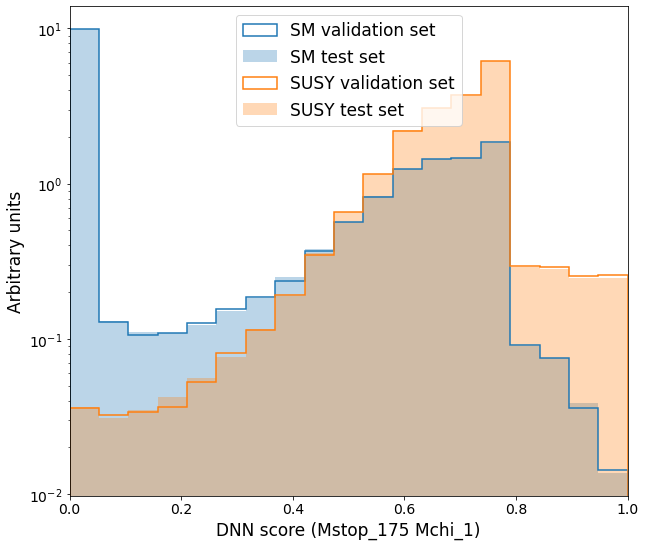

In [96]:
c0 = 'C0'
c1 = 'C1'
binning = np.linspace(0,1,20)
plt.figure(figsize=(10,9))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(y_pred_val[val_label == 0]  , bins=binning, label='SM validation set', histtype='step', linestyle='solid', linewidth=1.5, density=True, color=c0)
plt.hist(y_pred_test[test_label == 0], bins=binning, label='SM test set'    , alpha=0.3, linewidth=1.5, density=True , color=c0)
plt.hist(y_pred_val[val_label == 1]  , bins=binning, label='SUSY validation set', histtype='step' , linestyle='solid', linewidth=1.5, density=True, color=c1)
plt.hist(y_pred_test[test_label == 1], bins=binning, label='SUSY test set ', alpha=0.3, linewidth=1.5, density=True, color=c1)

plt.yscale('log')
#plt.ylim(0.01, 20)
plt.xlim(0,1)
plt.xlabel('DNN score (Mstop_175 Mchi_1)', fontsize=17)
plt.ylabel('Arbitrary units', fontsize=17)
plt.legend(loc='upper center', fontsize=17)

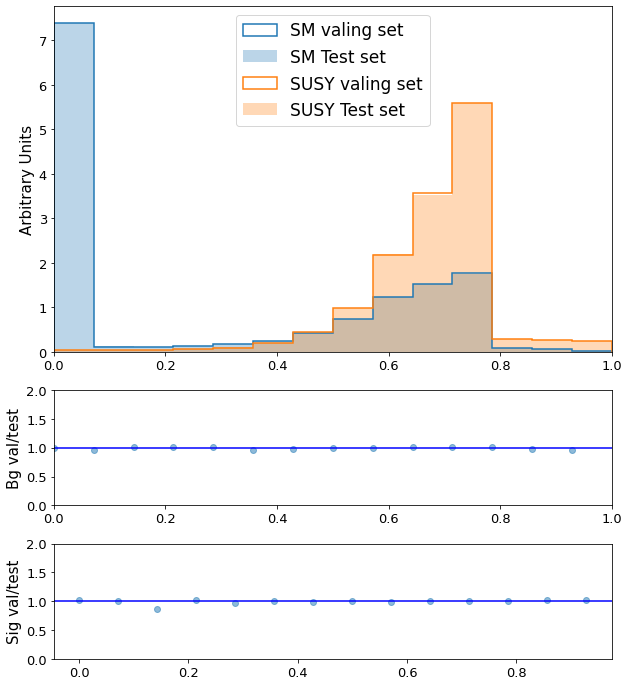

In [97]:
x_low    =  0
x_high   =  1

binning = np.linspace(x_low,x_high, 15)

ratio_fig_style = {
    'figsize': (10, 12),
    'gridspec_kw': {'height_ratios': (3, 1, 1)},
}

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, **ratio_fig_style)

ns1, bins1, patches  = ax1.hist(y_pred_val[val_label == 0], bins=binning, label='SM valing set', histtype='step', linestyle='solid', linewidth=1.5, density=True, color=c0)
ns2, bins2, patches  = ax1.hist(y_pred_test[test_label == 0]  , bins=binning, label='SM Test set'    , alpha=0.3, linewidth=1.5, density=True , color=c0)
ns3, bins3, patches  = ax1.hist(y_pred_val[val_label == 1], bins=binning, label='SUSY valing set', histtype='step' , linestyle='solid', linewidth=1.5, density=True, color=c1)
ns4, bins4, patches  = ax1.hist(y_pred_test[test_label == 1]  , bins=binning, label='SUSY Test set ', alpha=0.3, linewidth=1.5, density=True, color=c1)

ax1.legend(prop={'size': 17}, loc='upper center')
ax1.set_xlim(x_low,x_high)
ax2.scatter(binning[:-1],  # this is what makes it comparable
               ns1 / ns2,  # maybe check for div-by-zero!
                alpha=0.5)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Bg val/test' , fontsize=15)
#ax2.set_xlabel('ttbar mass (GeV)', fontsize=15)
ax2.set_ylim(0, 2)
ax2.set_xlim(x_low,x_high)

ax3.scatter(binning[:-1],  # this is what makes it comparable
               ns3 / ns4,  # maybe check for div-by-zero!
                alpha=0.5)

ax3.set_ylabel('Sig val/test', fontsize=15)
ax3.set_ylim(0, 2)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)
ax3.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
ax3.tick_params(axis="y", labelsize=13)

ax2.axhline(y=1, color='b', linestyle='-')
ax3.axhline(y=1, color='b', linestyle='-')
plt.show()

In [98]:
import eli5
from   eli5.sklearn import PermutationImportance

from keras.metrics import BinaryAccuracy
from eli5.permutation_importance import get_score_importances

def score(X, y):
    y_pred = model.predict(X).ravel()
    y_true = y.ravel()
    metric = BinaryAccuracy()
    metric.update_state(y_pred, y_true)
    return metric.result().numpy()

In [99]:
shuffler   = np.random.permutation(len(test_label))
test_data = test_data[shuffler]
test_label = test_label[shuffler]

In [100]:
base_score, score_decreases = get_score_importances(score, test_data[:50000], test_label[:50000])
feature_importances         = np.mean(score_decreases, axis = 0)

In [101]:
features = sig_df.columns
for i in range(len(feature_importances)) :
    print('Feature :: ' + str(features[i]) + ' importance :: ' + str(abs(feature_importances[i])))

Feature :: l_pt importance :: 1.1999905e-05
Feature :: l_phi importance :: 8.000061e-06
Feature :: l_eta importance :: 0.0
Feature :: lbar_pt importance :: 5.200007e-05
Feature :: lbar_phi importance :: 4.000077e-06
Feature :: lbar_eta importance :: 0.0
Feature :: llbar_dphi importance :: 2.000006e-05
Feature :: llbar_deta importance :: 7.200008e-05
Feature :: MET importance :: 2.000006e-05
Feature :: MT2 importance :: 8.8000015e-05
Feature :: stop_mass importance :: 0.0016560002
Feature :: chi0_mass importance :: 0.00068000006


In [213]:
mask  = sig_df_test['stop_mass'] == 275
mask &= sig_df_test['chi0_mass'] == 70

mstop_175_mchi_1_sig = sig_df_test[mask]

In [214]:
mask  = tt_df_test['stop_mass'] == 275
mask &= tt_df_test['chi0_mass'] == 70

mstop_175_mchi_1_tt = tt_df_test[mask]

In [215]:
mstop_175_mchi_1_sig_pred = model.predict(mstop_175_mchi_1_sig)
mstop_175_mchi_1_tt_pred  = model.predict(mstop_175_mchi_1_tt)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01685731, 0.15171583, 0.10114389, 1.02829621, 2.52016857,
        6.90307044, 3.13546057, 0.14328718, 0.        ]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
 [<matplotlib.patches.Polygon at 0x2e2de85b0>])

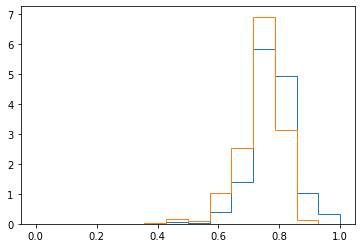

In [217]:
binning = np.linspace(0,1,15)
plt.hist(mstop_175_mchi_1_sig_pred, histtype='step', density=True, bins=binning)
plt.hist(mstop_175_mchi_1_tt_pred , histtype='step', density=True, bins=binning)

In [218]:
sig_event_w

0        1.129838
1        0.797295
2        0.921191
3        0.985262
4        0.946432
           ...   
34651    1.252666
34652    1.074728
34653    0.739630
34654    1.205884
34655    1.745865
Name: event_w, Length: 2987971, dtype: float64